In [17]:
import pandas as pd
from ipywidgets import interact, widgets
import plotly.express as px
from IPython.display import display
import warnings

# Read data from JSON file
df = pd.read_json('project_3.fridge_fills.json')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x['$date']))

# Drop '_id' column
df.drop('_id', axis=1, inplace=True, errors='ignore')

# Create a copy of the DataFrame with datetime 'Date' column
df_dates = df.copy()

# Define function to plot entries per month
def plot_entries_per_month(fill_type):
    if fill_type == 'All Fill Types':
        filtered_df = df_dates.copy()  
    else:
        filtered_df = df_dates[df_dates['Fill Type'] == fill_type].copy()  

    # Ensure datetime column has timezone information
    filtered_df['Date'] = filtered_df['Date'].dt.tz_localize(None)  # Remove any existing timezone information

    # Convert 'Date' column to Periods
    filtered_df.loc[:, 'YearMonth'] = filtered_df['Date'].dt.to_period('M').dt.strftime('%B')  

    monthly_counts = filtered_df.groupby('YearMonth').size().reset_index(name='Total Entries')

    # Set figure size
    fig = px.bar(monthly_counts, x='YearMonth', y='Total Entries', 
                 labels={'YearMonth': 'Month', 'Total Entries': 'Total Entries'},
                 title=f'Total Fills per Month for {fill_type} in 2023')

    fig.update_layout(xaxis_tickangle=-45, yaxis_gridcolor='lightgrey', 
                      width=800, height=500) 
    fig.show()

# Get unique values of 'Fill Type' for dropdown menu excluding 'nan'
fill_types = df_dates['Fill Type'].dropna().unique()
fill_types = list(fill_types)
fill_types.append('All Fill Types')  

# Create interactive dropdown menu
interact(plot_entries_per_month, fill_type=widgets.Dropdown(options=fill_types, description='Fill Type:'))


interactive(children=(Dropdown(description='Fill Type:', options=('Rescued Groceries', 'Purchased Groceries', …

<function __main__.plot_entries_per_month(fill_type)>

,Total Fills
Month,
May 2023,365
November 2023,307
December 2023,288
April 2023,271
June 2023,260
July 2023,260
October 2023,260
February 2023,244
September 2023,229


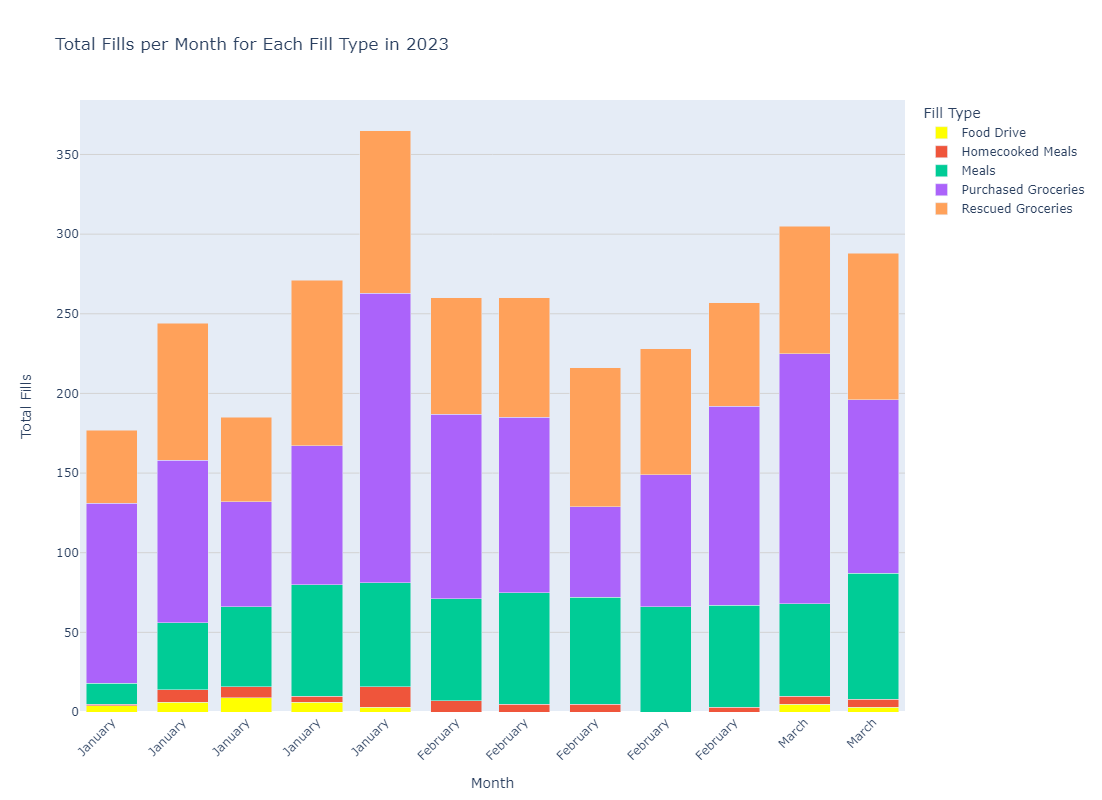

In [16]:
# Read data from JSON file
df = pd.read_json('project_3.fridge_fills.json')

# Suppress warning message
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="Converting to PeriodArray/Index representation will drop timezone information.")

    # Convert 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x['$date']))

    # Drop '_id' column
    df.drop('_id', axis=1, inplace=True, errors='ignore')

    # Create a copy of the DataFrame with datetime 'Date' column
    df_dates = df.copy()

    # Convert 'Date' column to Periods
    df_dates['YearMonth'] = df_dates['Date'].dt.to_period('M').astype(str)

    # Group by both 'YearMonth' and 'Fill Type' to count entries for each combination
    monthly_counts = df_dates.groupby(['YearMonth', 'Fill Type']).size().reset_index(name='Total Entries')

    # Set figure size
    fig = px.bar(monthly_counts, x='YearMonth', y='Total Entries', color='Fill Type',
                 labels={'YearMonth': 'Month', 'Total Entries': 'Total Fills'},
                 title='Total Fills per Month for Each Fill Type in 2023', barmode='stack')

    # Set color for "Food Drive" to yellow
    fig.update_traces(marker=dict(color='yellow'), selector=dict(name='Food Drive'))

    fig.update_layout(xaxis_tickangle=-45, yaxis_gridcolor='lightgrey', 
                      width=1100, height=800) 

    # Format x-axis labels
    fig.update_xaxes(tickvals=monthly_counts['YearMonth'].unique(), 
                     ticktext=pd.to_datetime(monthly_counts['YearMonth']).dt.strftime('%B'))

    # Calculate total fills per month
    monthly_counts = df_dates.groupby(df_dates['Date'].dt.to_period('M')).size().reset_index(name='Total Fills')

    # Format the month names
    monthly_counts['Month'] = monthly_counts['Date'].dt.strftime('%B %Y')

    # Sort the months based on the total fills
    monthly_counts_sorted = monthly_counts.sort_values(by='Total Fills', ascending=False)
    monthly_counts_sorted.set_index('Month', drop=True, inplace=True)
    monthly_counts_sorted.drop(columns=['Date'], inplace=True)
    display(monthly_counts_sorted)

    # Display the graph
    display(fig)
